In [36]:
import urllib.request as req
import pandas as pd

req.urlretrieve('https://raw.githubusercontent.com/ageron/handson-ml2/refs/heads/master/datasets/housing/housing.csv', 'datasets/housing.csv')

dataset: pd.DataFrame = pd.read_csv('datasets/housing.csv')

print(dataset.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

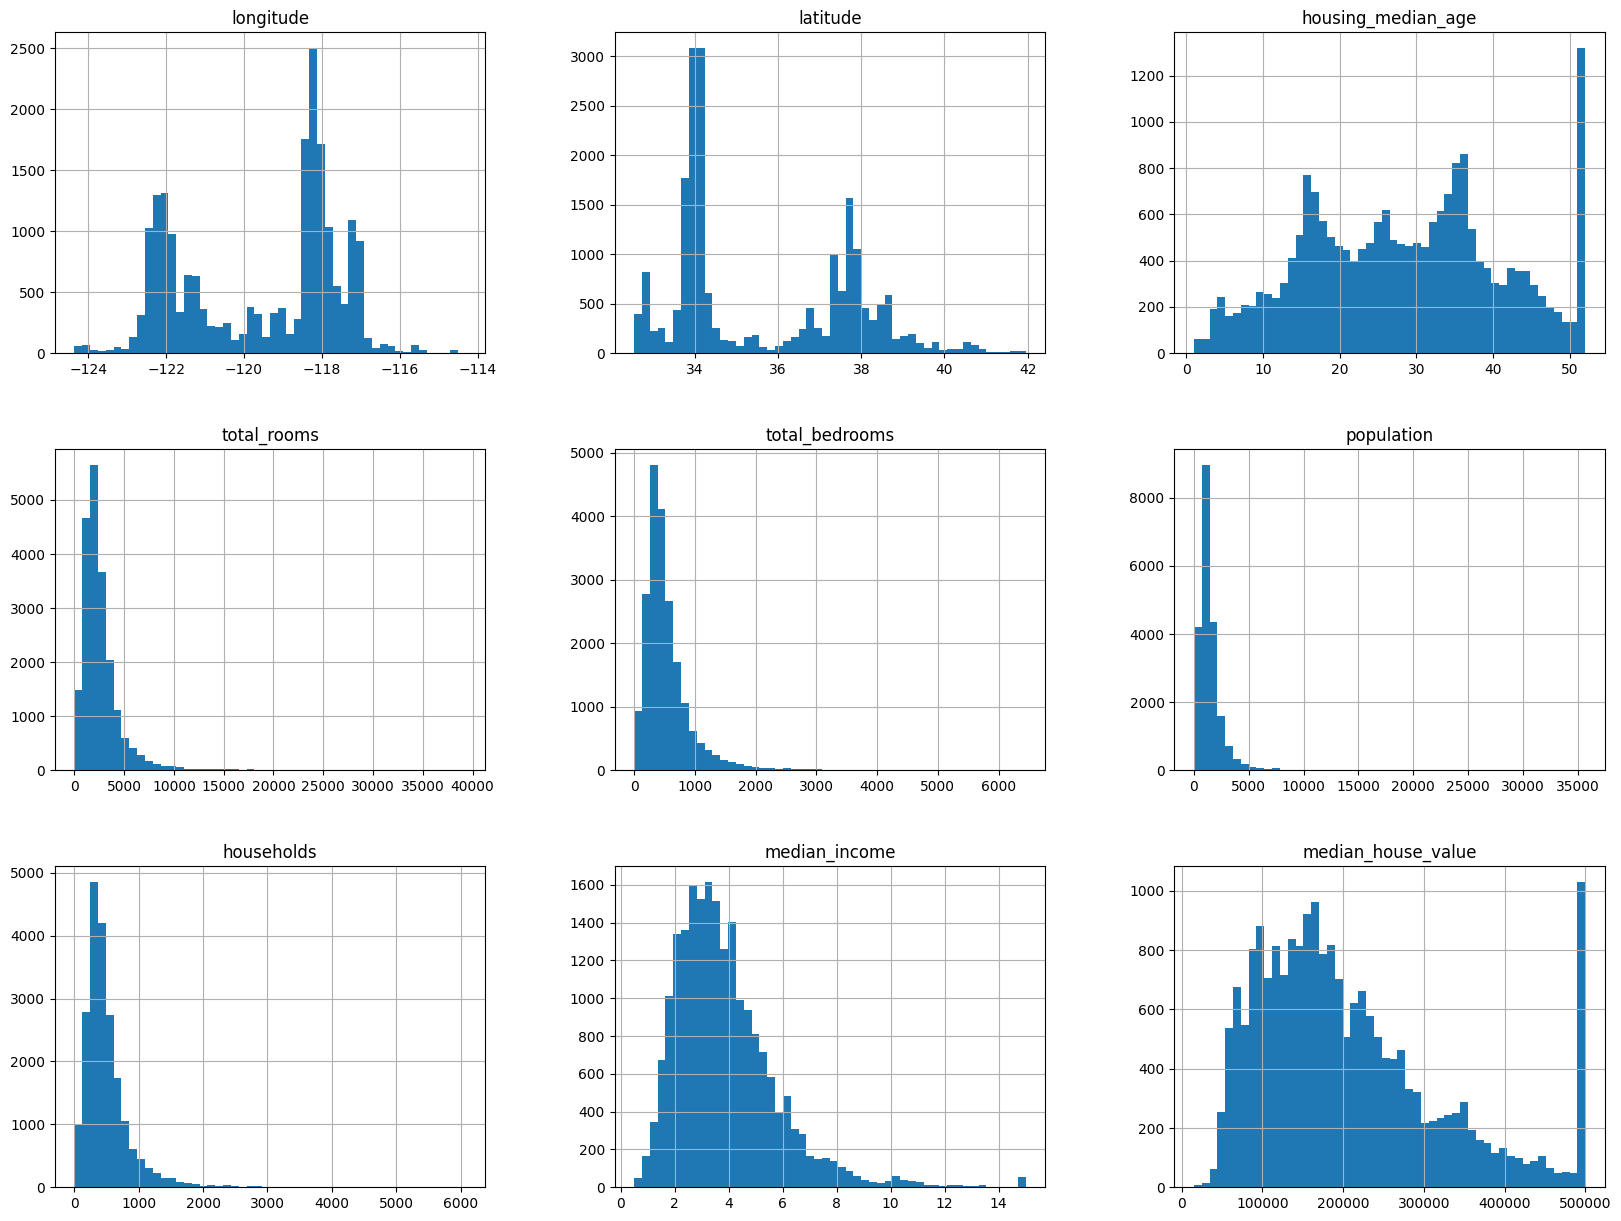

In [37]:
dataset.hist(bins=50, figsize=(20,15))

In [38]:
#Separando Dados de treino e dados de Teste

from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


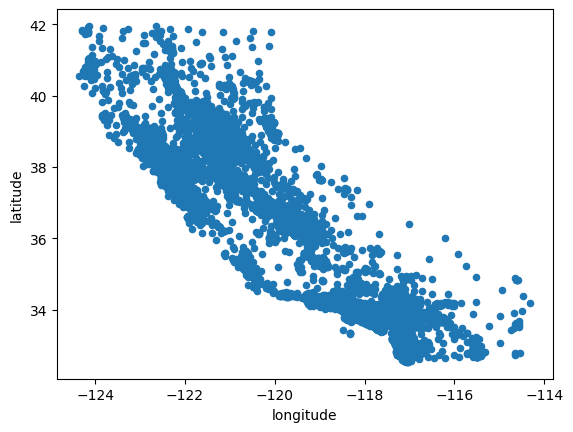

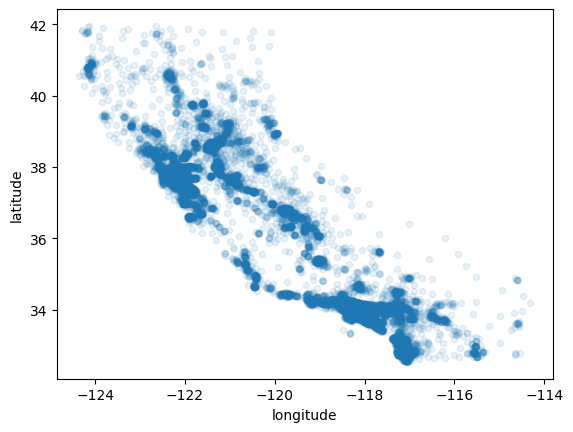

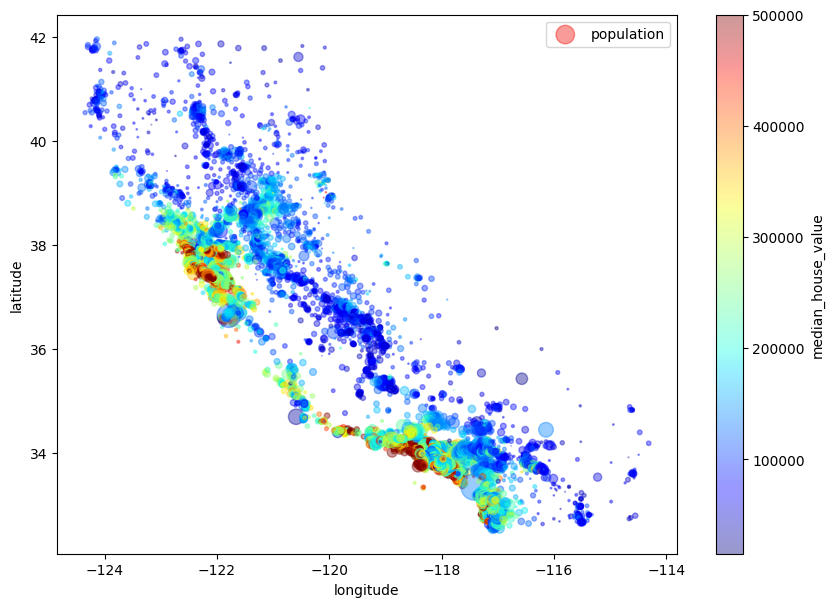

In [39]:
#Visualizando dados geográfico
import matplotlib.pyplot as plt

dataset.plot(kind='scatter', x='longitude', y='latitude')
dataset.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)


dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=dataset["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [40]:
#Buscando Correlações

correlacao_matrix = dataset.drop(axis=1, labels=['ocean_proximity'])
data_set_without_ocean_proximity = correlacao_matrix.copy()

correlacao_matrix['median_house_value'].sort_values(ascending=False)

5253     500001.0
5254     500001.0
5255     500001.0
5256     500001.0
5257     500001.0
           ...   
5887      17500.0
9188      14999.0
19802     14999.0
2799      14999.0
2521      14999.0
Name: median_house_value, Length: 20640, dtype: float64

In [41]:
#Tratativas para limpar uma tabela.

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(data_set_without_ocean_proximity)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [47]:
X = imputer.transform(data_set_without_ocean_proximity)
housing_tr = pd.DataFrame(X, columns=data_set_without_ocean_proximity.columns, index=data_set_without_ocean_proximity.index)

housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0
